## 1. Import and install dependencies

In [10]:
# !pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

cv2 (OpenCV) – A library for image and video processing.

NumPy – A library for efficient numerical computations and large-scale data processing.

Matplotlib (pyplot) – A library for data visualization and plotting.

MediaPipe – A library for real-time hand, face, and body detection.

time – A library for measuring execution time and handling time-related operations.

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
import time
import os

## 2. Accessing webcam using open cv and using holistic

In [6]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION (OPENCV)BGR TO (MEDIAPIPE)RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION (MEDIAPIPE)RGB TO (OPENCV)BGR
    return image, results

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face full mask
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw face contours
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen 
        cv2.imshow('OpenCV Feed', image)
    
        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

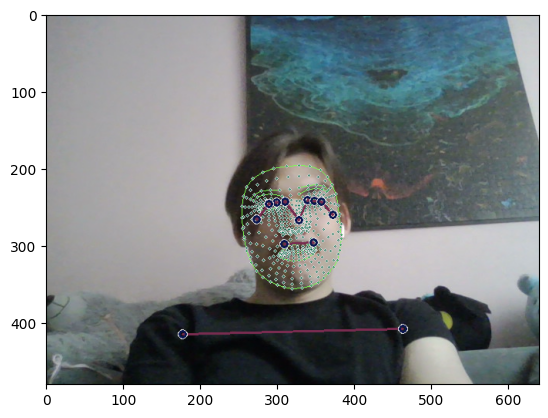

In [141]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 3. Extract keypoints 

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

dzien 

dobry

kochać

cię

do 

widzenia



In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('PJM_Data') 

# Actions that we try to detect
actions = np.array(['dzien', 'dobry', 'kocham', 'ciebie', 'do', 'widziec'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [33]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Records from internet

In [13]:
# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('dzien111.mp4')
DATA_PATH = os.path.join('PJM_Data') 
frames_counter = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        check, frame = cap.read()
        
        if check:
            # Make detection
            image, results = mediapipe_detection(frame, holistic)
            image = cv2.resize(image, (650, 500))
            # Draw landmarks
            draw_styled_landmarks(image, results)

            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, "dzien", "0", str(frames_counter))
            np.save(npy_path, keypoints)
            frames_counter = frames_counter + 1
            cv2.imshow("Capturing", image)
            key = cv2.waitKey(1)
        else:
            break
    
    print("Number of frames in the video: ", frames_counter)
    cap.release()
    cv2.destroyAllWindows()

Number of frames in the video:  29


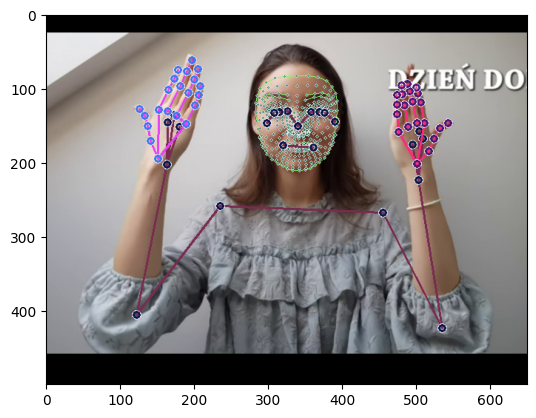

In [81]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Records from my camera

['dzien', 'dobry', 'kocham', 'ciebie', 'do', 'widziec']

In [37]:
# cap = cv2.VideoCapture(0)
# DATA_PATH = os.path.join('PJM_Data') 
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             number = 0
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 number += 1
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

## 4. Preprocess data

In [15]:
# divides data for test and train
from sklearn.model_selection import train_test_split
# convert data to one-hot encoding
from tensorflow.keras.utils import to_categorical

In [91]:
label_map = {label:num for num, label in enumerate(actions)}

In [93]:
label_map

{np.str_('dzien'): 0,
 np.str_('dobry'): 1,
 np.str_('kocham'): 2,
 np.str_('ciebie'): 3,
 np.str_('do'): 4,
 np.str_('widziec'): 5}

In [95]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [97]:
X = np.array(sequences)
X.shape

(180, 30, 1662)

In [99]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], shape=(180, 6))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(9, 6)

## Build and Train Neutral Network

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard

In [103]:
log_dir = os.path.join('Logs3')
tb_callback = TensorBoard(log_dir=log_dir)

In [105]:
model3 = Sequential([
    Input(shape=(30,1662)),  
    LSTM(64, return_sequences=True, activation='relu'),
    LSTM(128, return_sequences=True, activation='relu'),
    LSTM(64, return_sequences=False, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(actions.shape[0], activation='softmax')  
])

In [107]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model3.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])


Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - categorical_accuracy: 0.1622 - loss: 4.4855
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - categorical_accuracy: 0.1543 - loss: 2.4497
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - categorical_accuracy: 0.1813 - loss: 3.6310
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.1745 - loss: 1.8895
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.1856 - loss: 2.0790
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - categorical_accuracy: 0.0886 - loss: 1.8974
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.1864 - loss: 1.7840
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - categorical_accuracy: 0.2300 - loss: 1.7837
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.2893 - loss: 1.7181
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.3418 - loss: 1.6826
Epoch 11/1000
6/6 ━━━━━━━━━━━

In [89]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,324 (6.83 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,550 (4.55 MB)